# Laboratorio 1 – Ingeniería de Características (Parte 1)  
**Maestría en Investigación de Operaciones – Universidad Galileo**  
**Estudiante:** Jonathan Amado | **Carnet:** 14002285  

---

## Introducción

En este primer laboratorio aplicaremos técnicas de ingeniería de características utilizando un dataset real del sector hotelero. El objetivo es preparar los datos para análisis econométrico, asegurando su calidad mediante el tratamiento adecuado de valores faltantes y la codificación de variables categóricas.

El proceso incluye:  
- Identificación y análisis de valores faltantes.  
- Imputación de datos según el tipo de variable.  
- Codificación de variables categóricas.  
- Clasificación de variables como discretas o continuas.

El resultado final será un dataset limpio, transformado y listo para su uso en modelos econométricos o de machine learning.

In [33]:
# Importamos las librerías necesarias
import pandas as pd

# Cargar el dataset original
df = pd.read_csv("hotel_data.csv")

# Mostramos las primeras 5 filas del dataset para familiarizarnos con su estructura
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,No Deposit,NaN,NaN,0,Transient,NaN,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,...,No Deposit,304.0,NaN,0,Transient,NaN,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,NaN,0,Transient,NaN,0,1,Check-Out,2015-07-03


#### 1. Determine qué columnas poseen faltantes (NA o Nulos)


In [36]:
# Conteo de valores nulos por columna
missing_counts = df.isnull().sum()

# Filtrar solo columnas con al menos un valor faltante
missing_columns = missing_counts[missing_counts > 0]

# Mostrar resultados
missing_columns


adults                   17908
children                  9555
country                    488
distribution_channel     26265
agent                    16340
company                 112593
adr                      19102
dtype: int64

#### 2. Determine la proporción de faltantes para cada columna con faltantes, muestre una gráfica de barras con el porcentaje de faltantes para cada columna.


company                 94.306893
distribution_channel    21.999330
adr                     15.999665
adults                  14.999581
agent                   13.686238
children                 8.003183
country                  0.408744
dtype: float64


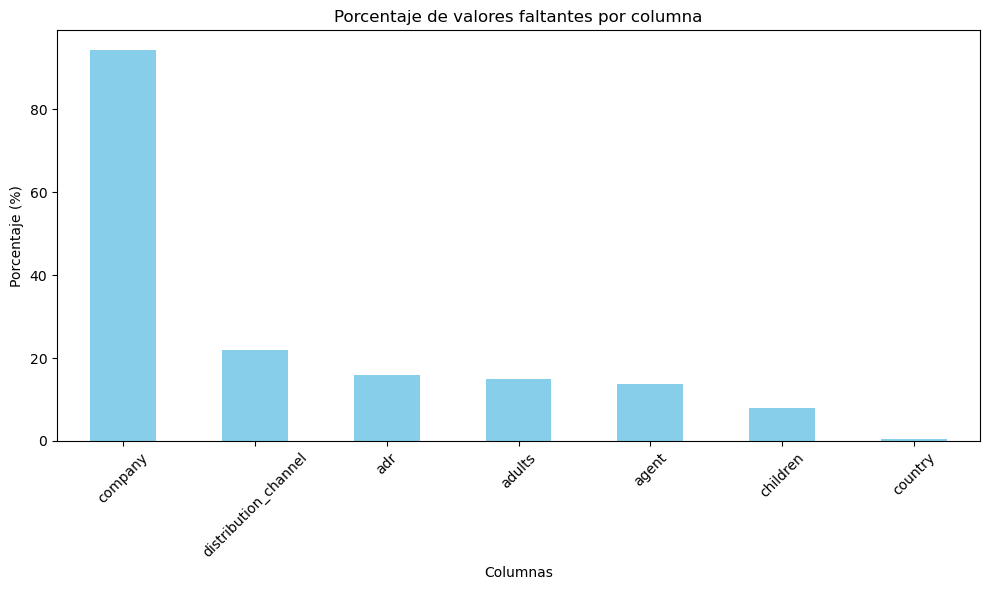

In [41]:
import matplotlib.pyplot as plt

# Total de filas
total_rows = len(df)

# Proporción de faltantes en porcentaje
missing_percent = (missing_columns / total_rows) * 100

# Ordenar de mayor a menor
missing_percent = missing_percent.sort_values(ascending=False)

# Mostrar tabla de proporciones
print(missing_percent)

# Graficar
plt.figure(figsize=(10, 6))
missing_percent.plot(kind='bar', color='skyblue')
plt.title('Porcentaje de valores faltantes por columna')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Columnas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
